In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

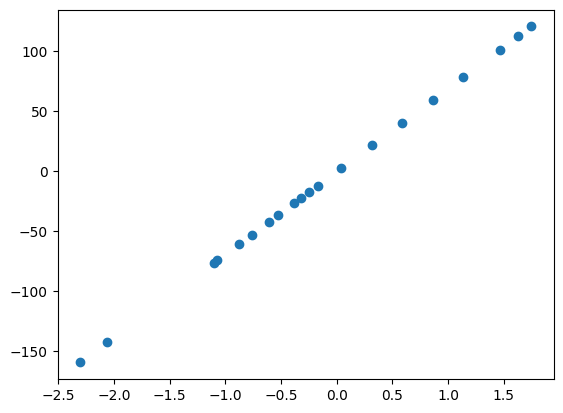

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5 * 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.616463343834714e-18


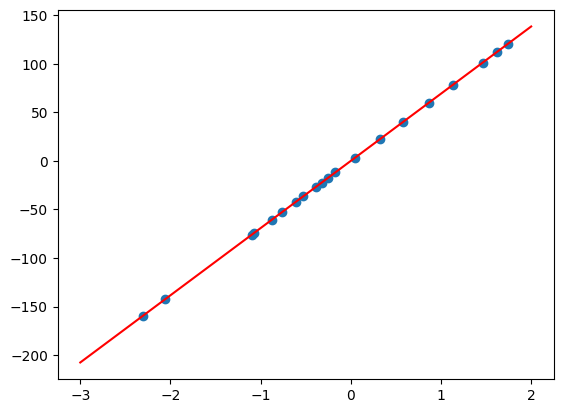

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

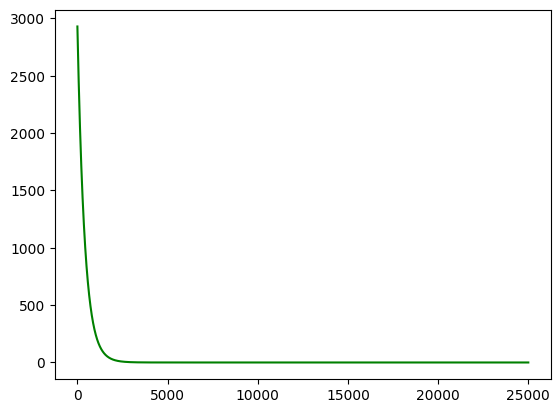

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 1.Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
arr1, arr2 = np.linspace(0, 100, 30), np.linspace(0, 100, 10)
np.random.shuffle(arr1), np.random.shuffle(arr2)

(None, None)

In [ ]:
for bo, b1 in zip(arr1, arr2):
    print(f'b0: {bo}, b1 {b1}')
    hyp = Model()
    hyp.bo = bo
    hyp.b1 = b1
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

b0: 58.62068965517241, b1 88.88888888888889
error after gradient descent: 1.310770826187363e-19
b0: 0.0, b1 0.0
error after gradient descent: 1.616463343834714e-18
b0: 6.896551724137931, b1 11.11111111111111
error after gradient descent: 1.1389832207184305e-18
b0: 89.6551724137931, b1 66.66666666666666
error after gradient descent: 2.163848866093225e-21
b0: 72.41379310344827, b1 55.55555555555556
error after gradient descent: 6.277282846714496e-20
b0: 10.344827586206897, b1 100.0
error after gradient descent: 3.206114536949907e-19
b0: 13.793103448275861, b1 22.22222222222222
error after gradient descent: 7.448751302436157e-19
b0: 82.75862068965517, b1 77.77777777777777
error after gradient descent: 2.492048820403462e-20
b0: 34.48275862068965, b1 33.33333333333333
error after gradient descent: 4.341010916576897e-19
b0: 31.034482758620687, b1 44.44444444444444
error after gradient descent: 2.0673180265119897e-19


# 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
for alpha in (np.linspace(0, 1, 30)):
    print(f'alpha: {alpha}')
    hyp = Model()
    steps, errors = hyp.fit(x, y, alpha=alpha)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

# 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit((x, y))
hyp.error(x, y)

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df

In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

In [ ]:
hyp = Model()
steps, errors = hyp.fit((df['x'], df['y']))
hyp.error(x, y)

# 4.Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

# 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=0.001, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1 and abs(errors[step - 1] - errors[step - 2]) < self.eps:
                print('Модель перестала обучаться')
                break
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')

        return steps, errors

In [ ]:
hyp = Model()
hyp.eps = 1e-3
steps, errors = hyp.fit(df)
hyp.error(x, y)

In [ ]:
hyp = Model()
hyp.eps = 1e-9
steps, errors = hyp.fit(df, max_steps=10_000)
hyp.error(x, y)

# 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')
        return steps, errors

In [ ]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=3)
hyp.error(x, y)

In [ ]:
hyp = Model()
hyp.eps = 1e-10
steps, errors = hyp.fit(df, alpha=1)
hyp.error(x, y)

# 7.Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.eps = 1e-6
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, inp, alpha=1, accuracy=0.01, max_steps=3 * 5000):
        if type(inp) == pd.DataFrame:
            X = inp.iloc[0:, 0]
            Y = inp.iloc[0:, 1]
        else:
            X = np.array(inp[0])
            Y = np.array(inp[1])
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step > 1:
                if abs(errors[step - 1] - errors[step - 2]) < self.eps:
                    print('Модель перестала обучаться')
                    break
                elif errors[step - 1] - errors[step - 2] > 0:
                    alpha = alpha / 2
        else:
            print('Модель обучилась успешно. Количество шагов закончилось.')
        print(f'final alpha: {alpha}')

        return steps, errors

    def model_plot(self, X=None):
        if X is None:
            X0 = np.linspace(-3, 2, 100)
        else:
            X0 = X
        Y0 = hyp.predict(X0)
        plt.figure()
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.show()


    def plot_error(self, steps, errors):
        plt.figure()
        plt.plot(steps, errors, 'g')
        plt.show()


In [ ]:
hyp = Model()
steps, errors = hyp.fit(df)
hyp.error(x, y)

In [ ]:
hyp.model_plot()

In [ ]:
hyp.model_plot(df['x'])

In [ ]:
hyp.plot_error(steps, errors)

## Доп задания

## 1. Изучите официальную документацию библиотеки sklearn. Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.

Линейная регрессия по обычному методу наименьших квадратов.

LinearReгрессия соответствует линейной модели с коэффициентами w = (w1,…, wp), чтобы минимизировать остаточную сумму квадратов между наблюдаемыми целями в наборе данных и целями, предсказанными с помощью линейного приближения.

С точки зрения реализации, это просто обычные методы наименьших квадратов (scipy.linalg.lstsq) или неотрицательные наименьшие квадраты (scipy.optimize.nnls), завернутые в объект предиктора.

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = x.to_numpy().reshape(-1, 1)
Y = y.to_numpy().reshape(-1, 1)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на ваших данных
model.fit(X, Y)

# Сделать предсказания
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Вывод коэффициентов и какого-то интерсепта
# Интерсепт (или также называется свободным членом) модели в контексте линейной регрессии - это значение,
# которое представляет собой оценку для зависимой переменной (Y), когда все независимые переменные (X) равны нулю.
# В других словах, это значение Y, когда нет влияния независимых переменных.

## 2. Почитайте в документации про встроенный метод оценки качества регрессии score. Используйте его для оценки качетсва модели. Реализуйте такой же расчет в собственном классе модели.

Метод оценки оценщика : у оценщиков есть score метод, обеспечивающий критерий оценки по умолчанию для проблемы, для решения которой они предназначены.

In [ ]:
class CustomLinearRegression:
    def __init__(self):
        # атрибуты сначала не имеют определенных значений
        self.coef_ = None
        self.intercept_ = None

    # обучение модели
    # Сначала он создает матрицу X путем добавления столбца из единиц (для интерсепта) к исходной матрице X.
    # Затем он вычисляет коэффициенты регрессии с использованием метода наименьших квадратов (OLS) с помощью обратной матрицы.
    def fit(self, X, Y):
        X = np.column_stack((np.ones(len(X)), X))
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ Y # наклон прямой
        self.intercept_ = self.coef_[0] # свободный член
        self.coef_ = self.coef_[1:]

    # Метод предсказания принимает матрицу X и использует обученные коэффициенты,
    # чтобы выполнить предсказания для каждой строки в X.
    # Результат - это предсказанные значения для Y.
    # Ŷ = b₀ + b₁X₁ + b₂X₂ + ... + bₖXₖ
    def predict(self, X):
        return self.intercept_ + X @ self.coef_

    # Этот метод вычисляет коэффициент детерминации (R-квадрат) для модели. Он принимает входные данные X и Y,
    # использует метод predict для получения предсказанных значений,
    # а затем вычисляет R-квадрат как меру объясненной дисперсии относительно общей дисперсии.
    # R-квадрат отражает, насколько хорошо модель соответствует данным.
    def r2_score(self, X, Y):
        Y_pred = self.predict(X)
        #SST = Σ(Yᵢ - Ȳ)²
        # Yᵢ - фактическое значение зависимой переменной для i-го наблюдения.
        # Ȳ - среднее значение зависимой переменной (среднее по всем наблюдениям).
        SS_total = ((Y - np.mean(Y)) ** 2).sum()
        #SSR = Σ(Yᵢ - Ŷᵢ)²
        #Yᵢ - фактическое значение зависимой переменной для i-го наблюдения.
        #Ŷᵢ - предсказанное значение зависимой переменной для i-го наблюдения с использованием модели.
        SS_residual = ((Y - Y_pred) ** 2).sum()
        #R² = 1 - (SSR / SST)
        r2 = 1 - (SS_residual / SS_total)
        return r2

custom_model = CustomLinearRegression()
custom_model.fit(X, Y)

r2_custom = custom_model.r2_score(X, Y)
print('Custom R^2 Score:', r2_custom)

## 3. (*) Реализуйте нормирование входных значений. Это нужно делать внутри класса модели. Лучше всего - внутри метода обучения. Необходимо привести значения признаков к шкале [0; 1]. Подумайте, как теперь корректно считать теоретические значения.

# z i = (x i – min(x)) / (max(x) – min(x))

In [ ]:
class CustomLinearRegression:
    def __init__(self):
        # Инициализация атрибутов модели
        self.coef_ = None  # Коэффициенты регрессии
        self.intercept_ = None  # Свободный член (пересечение) линейной модели

    def fit(self, X, Y):
        # Нормализация признаков
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)
        X_normalized = (X - min_vals) / (max_vals - min_vals)  # Нормализация данных

        # Обучение модели
        X_normalized = np.column_stack((np.ones(len(X_normalized)), X_normalized))  # Добавление столбца с единицами
        self.coef_ = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T @ Y  # Вычисление коэффициентов регрессии
        self.intercept_ = self.coef_[0]  # Установка свободного члена
        self.coef_ = self.coef_[1:]  # Удаление свободного члена из коэффициентов

    def predict(self, X):
        # Нормализация входных признаков
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)
        X_normalized = (X - min_vals) / (max_vals - min_vals)

        # Предсказание
        return self.intercept_ + X_normalized @ self.coef_

    def r2_score(self, X, Y):
        # Нормализация входных признаков
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)
        X_normalized = (X - min_vals) / (max_vals - min_vals)

        # Вычисление коэффициента детерминации (R^2)
        Y_pred = self.predict(X_normalized)  # Предсказание значений
        SS_total = ((Y - np.mean(Y)) ** 2).sum()  # Общая сумма квадратов
        SS_residual = ((Y - Y_pred) ** 2).sum()  # Сумма квадратов остатков
        r2 = 1 - (SS_residual / SS_total)
        return r2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Экземпляр класса
model = CustomLinearRegression()

# Генерирация случайных данных для демонстрации
np.random.seed(0) # вещь, чтобы сохранять рандомные данные (они не меняются!!!)
X = np.random.rand(100, 2)
#print(X[3:10])
Y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.rand(100)#(*****)

# Деление данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Оценка качества модели с помощью R^2
r2 = model.r2_score(X_test, Y_test)
print("R^2 score:", r2)

(*********)Умножение первого столбца матрицы X на 2 и второго столбца на 3 представляет собой специфичные коэффициенты, которые определяют линейную зависимость между признаками и целевой переменной в этом синтетическом примере. Эти коэффициенты были выбраны произвольно для создания данных с известной структурой.

class CustomLinearRegression:
    def __init__(self):
        # Инициализация атрибутов модели
        self.coef_ = None  # Коэффициенты регрессии
        self.intercept_ = None  # Свободный член (пересечение) линейной модели
        self.mean_ = None  # Средние значения признаков
        self.std_ = None  # Стандартные отклонения признаков
    
    def fit(self, X, Y):
        # Нормализация признаков
        self.mean_ = np.mean(X, axis=0)  
        self.std_ = np.std(X, axis=0)    
        X_normalized = (X - self.mean_) / self.std_  # Нормализация данных
        
        # Обучение модели
        X_normalized = np.column_stack((np.ones(len(X_normalized)), X_normalized))  # Добавление столбца с единицами
        self.coef_ = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T @ Y  # Вычисление коэффициентов регрессии
        self.intercept_ = self.coef_[0]  # Установка свободного члена
        self.coef_ = self.coef_[1:]  # Удаление свободного члена из коэффициентов
    
    def predict(self, X):
        # Нормализация входных признаков
        X_normalized = (X - self.mean_) / self.std_  
        
        # Предсказание
        return self.intercept_ + X_normalized @ self.coef_
    
    def r2_score(self, X, Y):
        # Нормализация входных признаков
        X_normalized = (X - self.mean_) / self.std_  
        
        # Вычисление коэффициента детерминации (R^2)
        Y_pred = self.predict(X_normalized)  # Предсказание значений
        SS_total = ((Y - np.mean(Y)) ** 2).sum()  # Общая сумма квадратов
        SS_residual = ((Y - Y_pred) ** 2).sum()  # Сумма квадратов остатков
        r2 = 1 - (SS_residual / SS_total)  
        return r2  